# Importar  Librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Cargar Archivo

df = pd.read_csv("C:/Users/user/Documents/Andres/2. Cursos/Python/Portafolio/DataSets/DataScience-main/Data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [6]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# Conocer el Conjunto de forma General

- ¿ Cuantos premios tenemos registrados?
- ¿ Cuantos premios han ganado hombres y mujeres?
- ¿ Que paises han ganado mas premios?
- ¿ Qué categoría tiene mas premios?


In [7]:
# Número de premios registrados
No_Premios = df["prize"].count()
print("Total de Premios Registrados", No_Premios)

# Cantidad de Premios Unicos 
unicos = df["prize"].nunique()   # método nunique de pandas conteo de unicos
unicos_lista  = df["prize"].unique()
unicos_b = len(unicos_lista)    # uso de función len() en el array de unicos_lista tambien se pudo con el ,size atributo de numpy


print("Total de Premios unicos:  ", unicos)
print("Total de Premios unicos b:  ", unicos_b)

Total de Premios Registrados 911
Total de Premios unicos:   579
Total de Premios unicos b:   579


In [8]:
# Premios  ganados por hombres y mujeres
Premios_por_Sexo = df["sex"].value_counts()
Premios_por_Sexo_porc = df["sex"].value_counts(normalize=True)*100   # Normalize para porcentaje
print("Premios por Sexo\n", Premios_por_Sexo )
print(f"Porcentaje por Sexo: {Premios_por_Sexo_porc}")

Premios por Sexo
 sex
Male      836
Female     49
Name: count, dtype: int64
Porcentaje por Sexo: sex
Male      94.463277
Female     5.536723
Name: proportion, dtype: float64


In [9]:
# Premios por país

premios_pais = df["birth_country"].value_counts().head(3).sort_values(ascending=False)    #Value counts ya ordena el conteo de mayor a menor por lo que no es necesario sort_values

print("Top 3 Premios por País", premios_pais)




Top 3 Premios por País birth_country
United States of America    259
United Kingdom               85
Germany                      61
Name: count, dtype: int64


In [10]:
# Categoría con mas premios
Nulos_categoria = df["category"].isnull().sum()
premios_categoria = df["category"].value_counts()
Top_1_Categoria =  premios_categoria.head(1).index[0]
print("Premios por Categoria" ,premios_categoria)
print("Número de Nulos en columna Category", Nulos_categoria)
print("Categoría con más premios", Top_1_Categoria)

Premios por Categoria category
Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: count, dtype: int64
Número de Nulos en columna Category 0
Categoría con más premios Medicine


In [11]:
#  Visualización por Laureate Type
Conteo_LaureateType =  df["laureate_type"].value_counts()
Conteo_LaureateType_porc = df["laureate_type"].value_counts(normalize=True)

print("Individual / Organización: \n", Conteo_LaureateType)
print("Porcentaje Individual / Organización: \n", Conteo_LaureateType_porc)

Individual / Organización: 
 laureate_type
Individual      881
Organization     30
Name: count, dtype: int64
Porcentaje Individual / Organización: 
 laureate_type
Individual      0.967069
Organization    0.032931
Name: proportion, dtype: float64


¿Que porcentaje de premios  tiene EEUU por decada?

In [12]:
df["USA_born_winner"] = df["birth_country"] == "United States of America"
df.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner
534,1982,Peace,The Nobel Peace Prize 1982,NaN,1/2,544,Individual,Alfonso García Robles,1911-03-20,Zamora,Mexico,Male,NaN,NaN,NaN,1991-09-02,Mexico City,Mexico,False
184,1936,Literature,The Nobel Prize in Literature 1936,"""for the power, honesty and deep-felt emotions...",1/1,608,Individual,Eugene Gladstone O'Neill,1888-10-16,"New York, NY",United States of America,Male,NaN,NaN,NaN,1953-11-27,"Boston, MA",United States of America,True
499,1979,Medicine,The Nobel Prize in Physiology or Medicine 1979,"""for the development of computer assisted tomo...",1/2,417,Individual,Allan M. Cormack,1924-02-23,Johannesburg,South Africa,Male,Tufts University,"Medford, MA",United States of America,1998-05-07,"Winchester, MA",United States of America,False
271,1952,Physics,The Nobel Prize in Physics 1952,"""for their development of new methods for nucl...",1/2,59,Individual,Edward Mills Purcell,1912-08-30,"Taylorville, IL",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1997-03-07,"Cambridge, MA",United States of America,True
599,1989,Physics,The Nobel Prize in Physics 1989,"""for the invention of the separated oscillator...",1/2,135,Individual,Norman F. Ramsey,1915-08-27,"Washington, DC",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,2011-11-04,"Wayland, MA",United States of America,True


In [13]:
#Creación de nueva columna en df decada
#np.floor función de nump para redondear hacia abajo el valor
# np.floor(df["year"]/10 pasa el año a decimal para afplicar la función floor de numpy y se multiplica el valor por 10 para obtener la decada
df["Decade"] = (np.floor(df["year"]/10)*10).astype(int)     
df.sample(5)

# .mean(): calcula la media de USA_born_winner por grupo (Decade). 
# booleanos se tratan como 1 (True) y 0 (False), la media es la proporción de ganadores nacidos en EEUU
Prop_USA_winners = df.groupby("Decade",as_index= False)["USA_born_winner"].mean()
Prop_USA_winners["USA_born_winner"] = round(Prop_USA_winners["USA_born_winner"] * 100,2)
Prop_USA_winners

,Decade,USA_born_winner
0,1900,1.75
1,1910,7.50
2,1920,7.41
3,1930,25.00
4,1940,30.23
5,1950,29.17
6,1960,26.58
7,1970,31.73
8,1980,31.96
9,1990,40.38


In [14]:
print(Prop_USA_winners.columns)


Index(['Decade', 'USA_born_winner'], dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

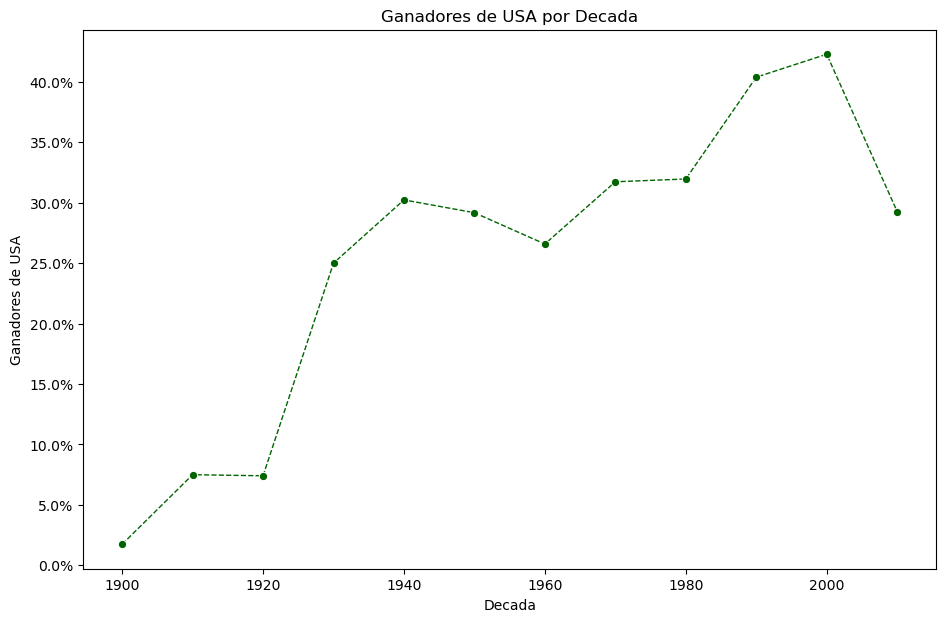

In [15]:
plt.figure(figsize=(11,7))

ax = sns.lineplot(
    x = "Decade",
    y = "USA_born_winner",
    data= Prop_USA_winners,
    color = "darkgreen",
    marker="o",
    linewidth=1,
    linestyle="--"
)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())
ax.set_title("Ganadores de USA por Decada")
ax.set_ylabel("Ganadores de USA")
ax.set_xlabel("Decada")

plt.savefig("C:/Users/user/Documents/Andres/2. Cursos/Python/Portafolio/Ganadores_Premio_Nobel/figura_ax", dpi = 150, transparent = True)
plt.show

¿Cual es el porcentaje de victoria de hombres y mujeres en las distintas categorías

In [16]:
Prop_por_sexo_Categoria= df.groupby("category", as_index= False)["sex"].value_counts(normalize= True)
Prop_por_sexo_Categoria["proportion"] = round(Prop_por_sexo_Categoria["proportion"] *100,2)
Prop_por_sexo_Categoria

,category,sex,proportion
0,Chemistry,Male,97.71
1,Chemistry,Female,2.29
2,Economics,Male,98.72
3,Economics,Female,1.28
4,Literature,Male,87.61
5,Literature,Female,12.39
6,Medicine,Male,94.31
7,Medicine,Female,5.69
8,Peace,Male,84.62
9,Peace,Female,15.38


<function matplotlib.pyplot.show(close=None, block=None)>

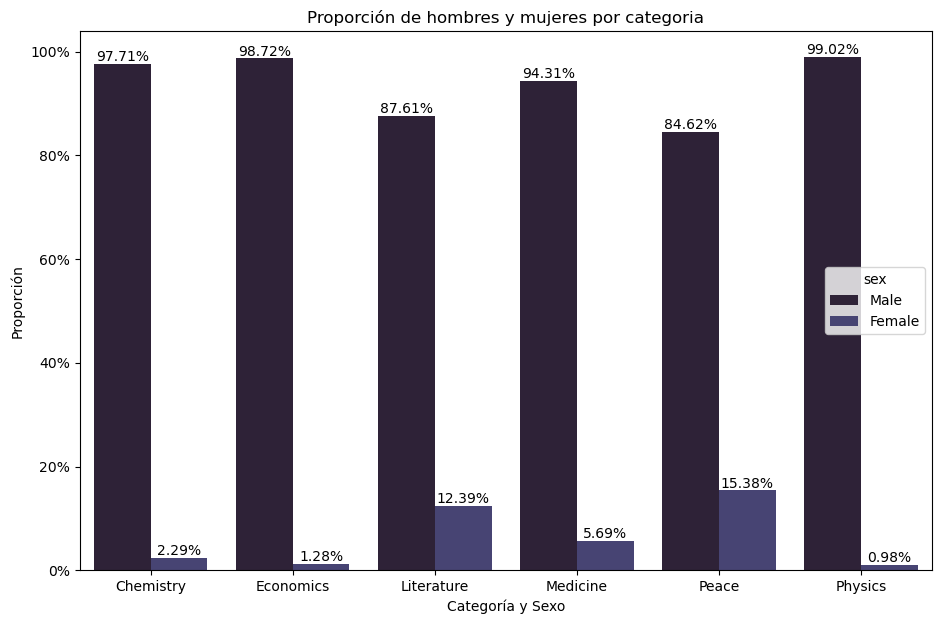

In [22]:
plt.figure(figsize=(11,7))

figura1 = sns.barplot(
    x ="category",
    y = "proportion",
    hue="sex",
    data = Prop_por_sexo_Categoria,
    color = sns.set_palette("mako")

)

from matplotlib.ticker import PercentFormatter
figura1.yaxis.set_major_formatter(PercentFormatter())
figura1.set_title("Proporción de hombres y mujeres por categoria")
figura1.set_ylabel("Proporción")
figura1.set_xlabel("Categoría y Sexo")


for container in  figura1.containers:
    figura1.bar_label(container, fmt= "%.2f%%")

plt.savefig("C:/Users/user/Documents/Andres/2. Cursos/Python/Portafolio/Ganadores_Premio_Nobel/figura1.png",dpi = 150,transparent=True)
plt.show


In [18]:
df["female_winner"] = df["sex"] == "Female"   # genera nueva columna female con valores booleanos true false
prop_female_winner = df.groupby(["Decade", "category"], as_index = False)["female_winner"].mean()
prop_female_winner["female_winner"] = round(prop_female_winner["female_winner"]*100, 2)
prop_female_winner

,Decade,category,female_winner
0,1900,Chemistry,0.00
1,1900,Literature,10.00
2,1900,Medicine,0.00
3,1900,Peace,7.14
4,1900,Physics,7.69
...,...,...,...
61,2010,Economics,0.00
62,2010,Literature,28.57
63,2010,Medicine,12.50
64,2010,Peace,40.00


<function matplotlib.pyplot.show(close=None, block=None)>

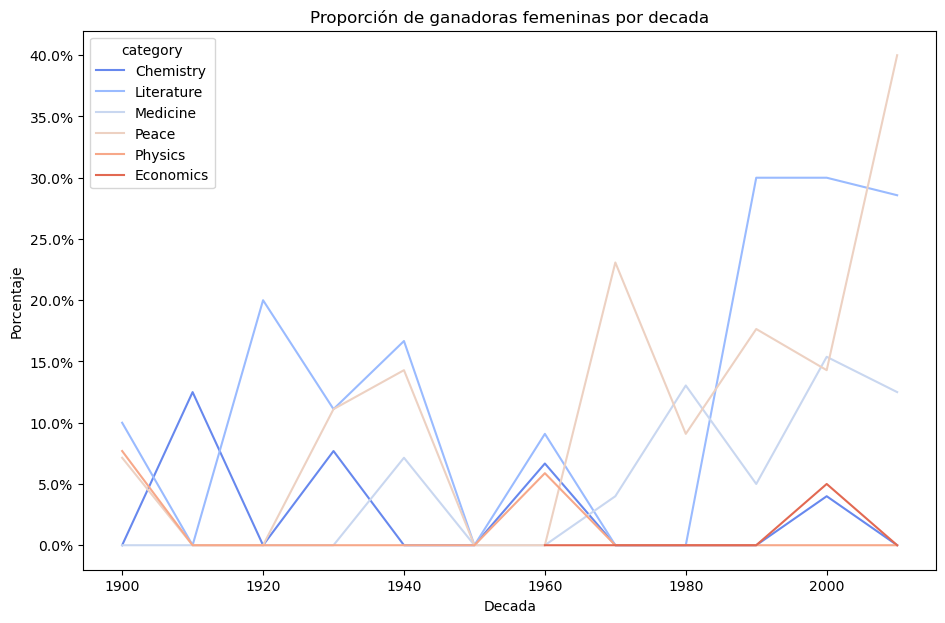

In [23]:
plt.figure(figsize=(11,7))

figura2 = sns.lineplot(
    x = "Decade",
    y = "female_winner",
    data = prop_female_winner,
    hue = "category",
    color = sns.set_palette("coolwarm")
)

from matplotlib.ticker import PercentFormatter

figura2.yaxis.set_major_formatter(PercentFormatter())
figura2.set_title("Proporción de ganadoras femeninas por decada")
figura2.set_xlabel("Decada")
figura2.set_ylabel("Porcentaje")
plt.show


 ¿De que edad hay mas ganadores?

In [25]:

df.sample(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_born_winner,Decade,female_winner
681,1997,Medicine,The Nobel Prize in Physiology or Medicine 1997,"""for his discovery of Prions - a new biologica...",1/1,457,Individual,Stanley B. Prusiner,1942-05-28,"Des Moines, IA",...,Male,University of California School of Medicine,"San Francisco, CA",United States of America,NaN,NaN,NaN,True,1990,False
751,2003,Literature,The Nobel Prize in Literature 2003,"""who in innumerable guises portrays the surpri...",1/1,763,Individual,John M. Coetzee,1940-02-09,Cape Town,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,2000,False
13,1903,Chemistry,The Nobel Prize in Chemistry 1903,"""in recognition of the extraordinary services ...",1/1,162,Individual,Svante August Arrhenius,1859-02-19,Vik,...,Male,Stockholm University,Stockholm,Sweden,1927-10-02,Stockholm,Sweden,False,1900,False
613,1991,Chemistry,The Nobel Prize in Chemistry 1991,"""for his contributions to the development of t...",1/1,276,Individual,Richard R. Ernst,1933-08-14,Winterthur,...,Male,Eidgenössische Technische Hochschule (Swiss Fe...,Zurich,Switzerland,NaN,NaN,NaN,False,1990,False
292,1956,Chemistry,The Nobel Prize in Chemistry 1956,"""for their researches into the mechanism of ch...",1/2,220,Individual,Nikolay Nikolaevich Semenov,1896-04-03,Saratov,...,Male,Institute for Chemical Physics of the Academy ...,Moscow,Union of Soviet Socialist Republics,1986-09-25,Moscow,Union of Soviet Socialist Republics,False,1950,False


In [ ]:
fecha = pd.Series(pd.to_datetime(["12/03/2024"]))
fecha.dt.day_name()


In [49]:
df["birth_date"] = pd.to_datetime(df["birth_date"])  # Transformación a categoria de fecha

df["Edad"] = df["year"] - df["birth_date"].dt.year   # dt.year extrae año de series tipo df 

ganadores_por_edad = (df.groupby("Edad", as_index= False)["category"].count().rename(columns={"category":"total ganadores",}))   #método rename para modificar nombre columna
ganadores_por_edad

,Edad,total ganadores
0,17.0,1
1,25.0,1
2,31.0,4
3,32.0,4
4,33.0,4
...,...,...
57,86.0,1
58,87.0,5
59,88.0,2
60,89.0,1


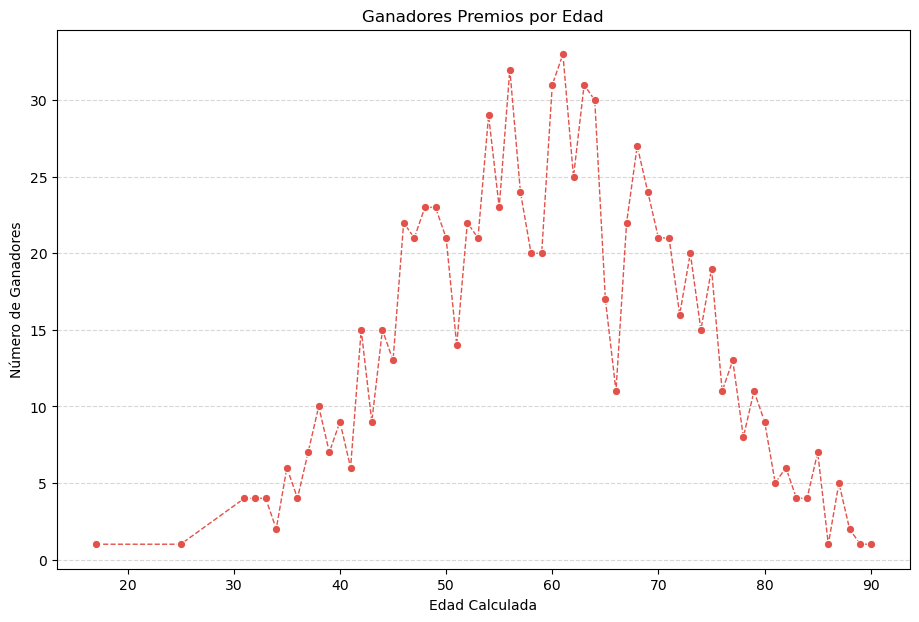

In [99]:
plt.figure(figsize=(11,7))
plt.grid(axis="y",linestyle="--", alpha=0.5)
figura3 = sns.lineplot(
    x="Edad",
    y="total ganadores",
    data= ganadores_por_edad,
    marker="o",
    linewidth=1,
    linestyle="--",
    color= sns.set_palette("Spectral")



)

figura3.set_title("Ganadores Premios por Edad")
figura3.set_xlabel("Edad Calculada")
figura3.set_ylabel("Número de Ganadores")
plt.show()

In [69]:
rangos = range(0, int(df["Edad"].max() + 6), 5)
df["Edad_Quinquenal"] = pd.cut(
    df["Edad"],bins=rangos,right=False
)
df["Edad_Quinquenal"]

ganadores_por_edad_quinquenal = df.groupby("Edad_Quinquenal", as_index= False)["category"].count().rename(columns={"category":"Conteo"})
ganadores_por_edad_quinquenal

C:\Users\user\AppData\Local\Temp\ipykernel_6360\3059013731.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ganadores_por_edad_quinquenal = df.groupby("Edad_Quinquenal", as_index= False)["category"].count().rename(columns={"category":"Conteo"})


,Edad_Quinquenal,Conteo
0,"[0, 5)",0
1,"[5, 10)",0
2,"[10, 15)",0
3,"[15, 20)",1
4,"[20, 25)",0
5,"[25, 30)",1
6,"[30, 35)",14
7,"[35, 40)",34
8,"[40, 45)",54
9,"[45, 50)",102


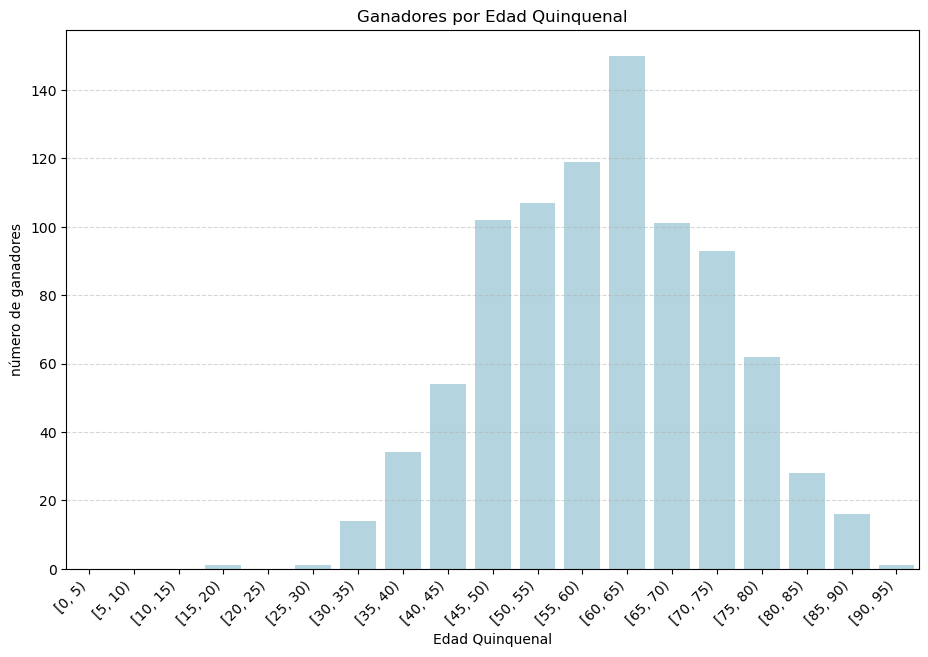

In [100]:
plt.figure(figsize=(11,7))
plt.grid(axis="y",linestyle="--",alpha=0.5)
plt.xticks(rotation=45,ha="right")
orden = ganadores_por_edad_quinquenal["Edad_Quinquenal"].unique()

figura4 = sns.barplot(
    x= "Edad_Quinquenal",
    y= "Conteo",
    data= ganadores_por_edad_quinquenal,
    color = "Lightblue",
    order = orden
    )
figura4.set_title("Ganadores por Edad Quinquenal")
figura4.set_ylabel("número de ganadores")
figura4.set_xlabel("Edad Quinquenal")

plt.show()

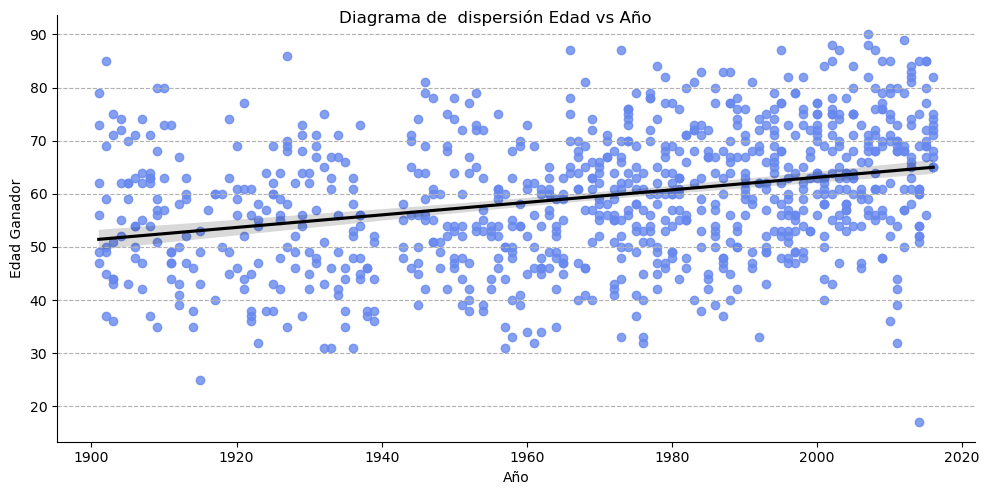

In [115]:
figura5 = sns.lmplot(
    x= "year",
    y= "Edad",
    data= df,
    aspect=2,
    line_kws={"color":"black"},

)
plt.grid(axis="y",linestyle="--")
figura5.fig.suptitle("Diagrama de  dispersión Edad vs Año")
figura5.set_xlabels("Año")
figura5.set_ylabels("Edad Ganador")
plt.show()

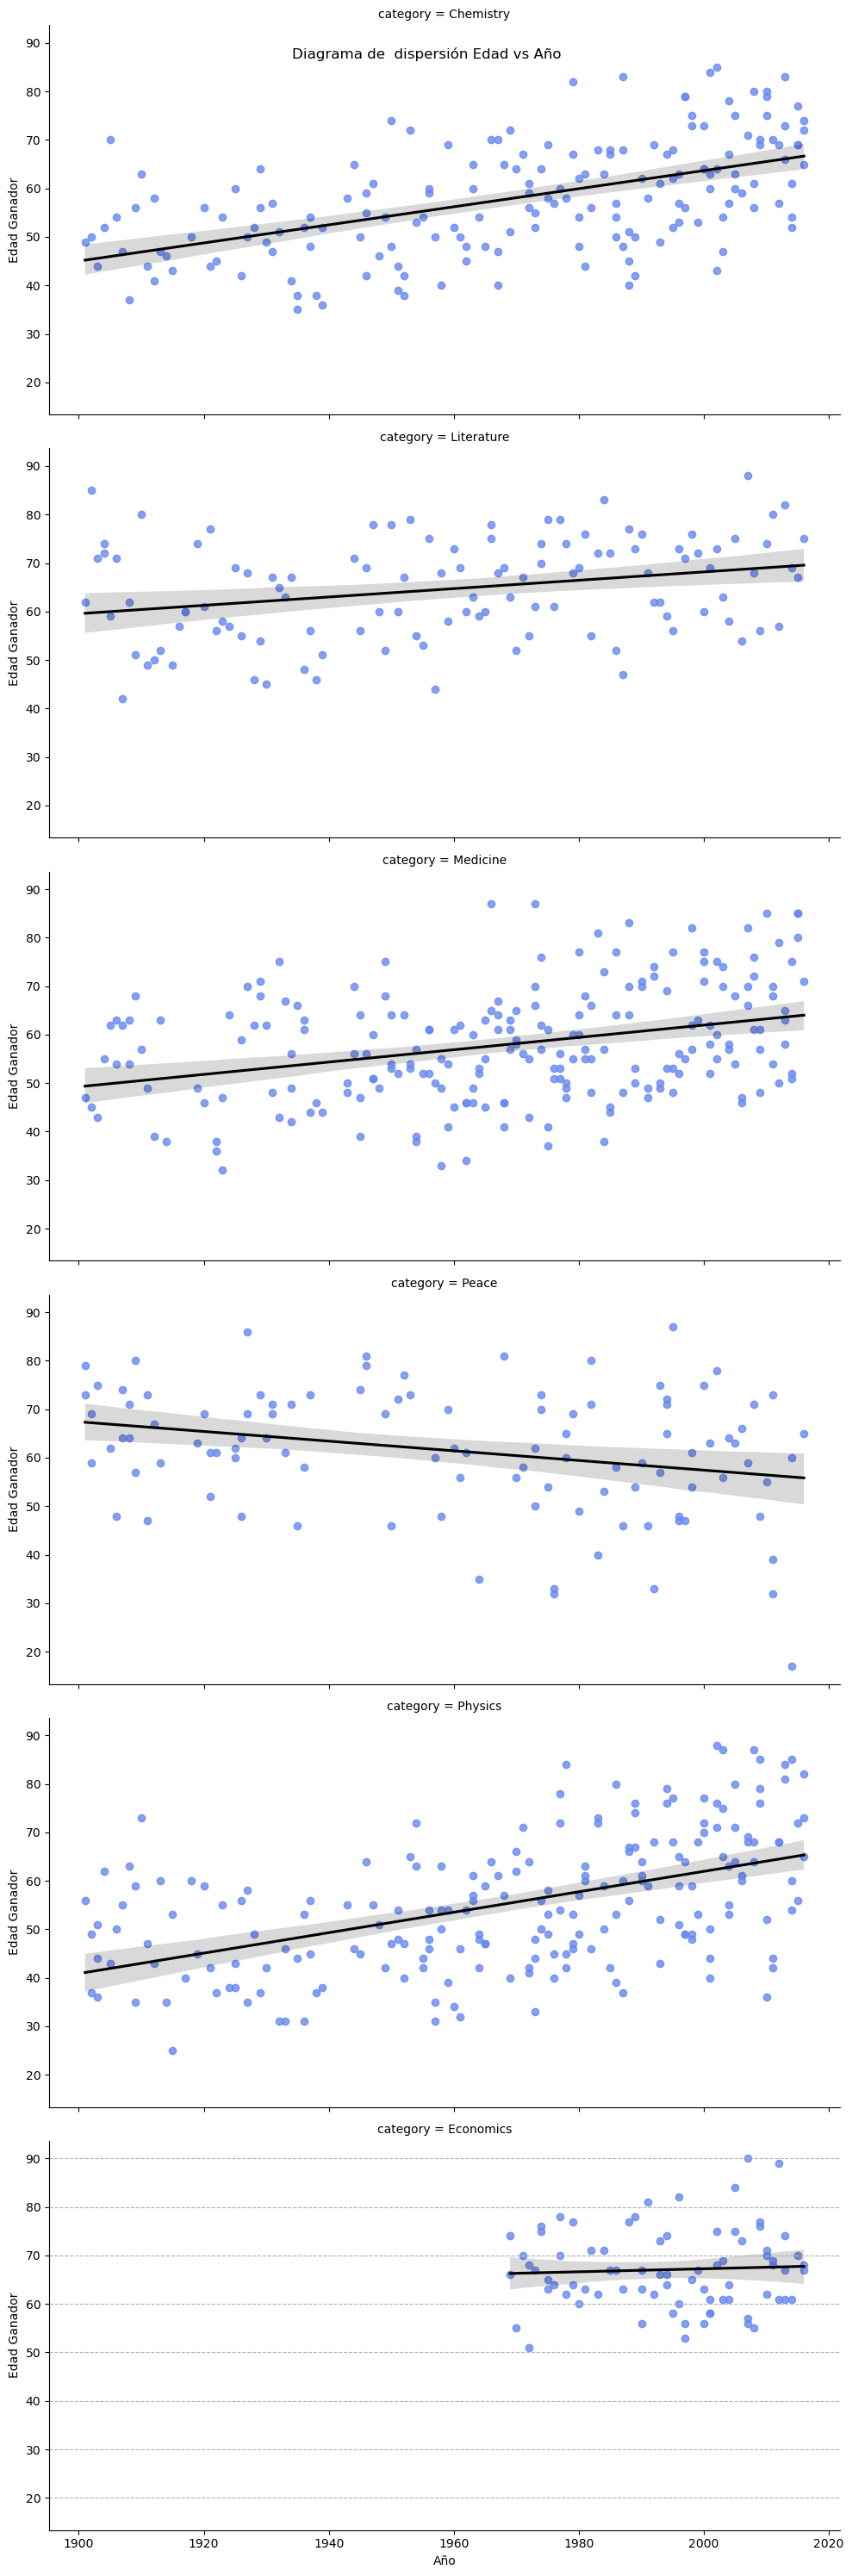

In [ ]:
figura5 = sns.lmplot(
    x= "year",
    y= "Edad",
    data= df,
    aspect=2,
    line_kws={"color":"black"},
    row= "category"             #agregar keyword row saca el diagrama por cada categoría

)
plt.grid(axis="y",linestyle="--")
figura5.fig.suptitle("Diagrama de  dispersión Edad vs Año")
figura5.set_xlabels("Año")
figura5.set_ylabels("Edad Ganador")
plt.show()

¿Quien es la persona mas vieja y mas joven en ganar un premio nobel?

In [148]:
ganador_ordenados = df[["full_name","Edad"]].sort_values("Edad",ascending= False)
ganador_mas_joven = ganador_ordenados.tail(29)
ganador_mas_viejo = ganador_ordenados.head(5)
print(f"El ganador mas viejo es: {ganador_mas_viejo} \n" f"El ganador mas joven es: {ganador_mas_joven}")

print(df[["full_name","Edad"]].nsmallest(1,"Edad"))
print(df[["full_name", "Edad"]].nlargest(1,"Edad"))

El ganador mas viejo es:              full_name  Edad
793     Leonid Hurwicz  90.0
856   Lloyd S. Shapley  89.0
796      Doris Lessing  88.0
744  Raymond Davis Jr.  88.0
431    Karl von Frisch  87.0 
El ganador mas joven es:                                              full_name  Edad
885                                   Malala Yousafzai  17.0
24   Institut de droit international (Institute of ...   NaN
60   Bureau international permanent de la Paix (Per...   NaN
89   Comité international de la Croix Rouge (Intern...   NaN
200  Office international Nansen pour les Réfugiés ...   NaN
215  Comité international de la Croix Rouge (Intern...   NaN
237              Friends Service Council (The Quakers)   NaN
238   American Friends Service Committee (The Quakers)   NaN
283  Office of the United Nations High Commissioner...   NaN
348  Comité international de la Croix Rouge (Intern...   NaN
349  Ligue des Sociétés de la Croix-Rouge (League o...   NaN
366            United Nations Children's Fu